# Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
from glob import glob
from tqdm import tqdm

In [2]:
import json

def read_json_file(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data



In [3]:
# Example usage:
file_path = '/kaggle/input/superai-north-seed-detection/boundarybox_seed_train.json'
json_data = read_json_file(file_path)


In [4]:
info = json_data['info']
images = json_data['images']
annotations = json_data['annotations']
categories = json_data['categories']

In [5]:
image_path_list = glob('/kaggle/input/superai-north-seed-detection/train/*.jpg')

In [6]:
# images

In [7]:
# annotations

In [8]:
# annotations_for_image

In [9]:
class_names = {
 1: 'adenanthera_pavonina',
 2: 'alangium_kurzii',
 3: 'albizia_chinensis',
 4: 'antidesma_bunius',
 5: 'bridelia_glauca',
 6: 'cassia_bakeriana',
 7: 'cassia_fistula',
 8: 'cassia_grandis',
 9: 'choerospondias_axillaris',
 10: 'delbergia_oliveri',
 11: 'drypetes_roxburghii',
 12: 'hovenia_dulcis',
 13: 'magnolia_baillonii',
 14: 'ostodes_paniculata',
 15: 'phyllanthus_emblica',
 16: 'prunus_cerasoides',
 17: 'rhus_rhetsoides',
 18: 'sapindus_rarak',
 19: 'trewia_nudiflora',
 20: 'turpinia_pomifera'
}

# Crop image to classification

In [10]:
# # Create class directories once
# output_dir = '/kaggle/working/image_classification'
# for class_id, class_name in class_names.items():
#     class_dir = os.path.join(output_dir, class_name)
#     os.makedirs(class_dir, exist_ok=True)

# # Turn off interactive mode to avoid displaying images
# plt.ioff()

# for image_data in tqdm(images):
#     image_id = image_data['id']
#     image_file_name = image_data['file_name']
#     image_path = f"/kaggle/input/superai-north-seed-detection/train/{image_file_name}"

#     # Load the image using cv2
#     image = cv2.imread(image_path)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#     # Find all annotations (bounding boxes) associated with this image_id
#     annotations_for_image = [anno for anno in annotations if anno['image_id'] == image_id]

#     # Create a copy of the image to avoid modifying the original
#     image_cropped = image.copy()

#     for i, annotation in enumerate(annotations_for_image):
#         class_id = annotation['category_id']
#         class_name = class_names[class_id]

#         bbox = annotation['bbox']
#         x, y, width, height = map(int, bbox)

#         # Calculate the coordinates of the opposite corner
#         x2, y2 = x + width, y + height

#         # Draw the bounding box on the image
#         cv2.rectangle(image, (x, y), (x2, y2), (255, 0, 0), 5)

#         # Save the cropped image with bounding box
#         image_crop_path = os.path.join(output_dir, class_name, f"{image_file_name.split('.')[0]}_{i}.png")
#         plt.imshow(image_cropped[y:y2, x:x2])
#         plt.savefig(image_crop_path)

In [11]:
for class_path in os.listdir('/kaggle/input/seed-classification/seed_classfication/image_classification'):
    print(f'{class_path.split("/")[-1]} : {len(class_path)}')

antidesma_bunius : 16
choerospondias_axillaris : 24
albizia_chinensis : 17
bridelia_glauca : 15
hovenia_dulcis : 14
cassia_fistula : 14
rhus_rhetsoides : 15
cassia_bakeriana : 16
ostodes_paniculata : 18
adenanthera_pavonina : 20
magnolia_baillonii : 18
trewia_nudiflora : 16
phyllanthus_emblica : 19
drypetes_roxburghii : 19
alangium_kurzii : 15
delbergia_oliveri : 17
turpinia_pomifera : 17
prunus_cerasoides : 17
sapindus_rarak : 14
cassia_grandis : 14


# Fast Ai to classfication model

In [12]:
import timm
import cv2

In [13]:
timm.list_models('*eva02*', pretrained = True)

['eva02_base_patch14_224.mim_in22k',
 'eva02_base_patch14_448.mim_in22k_ft_in1k',
 'eva02_base_patch14_448.mim_in22k_ft_in22k',
 'eva02_base_patch14_448.mim_in22k_ft_in22k_in1k',
 'eva02_base_patch16_clip_224.merged2b',
 'eva02_enormous_patch14_clip_224.laion2b',
 'eva02_enormous_patch14_clip_224.laion2b_plus',
 'eva02_large_patch14_224.mim_in22k',
 'eva02_large_patch14_224.mim_m38m',
 'eva02_large_patch14_448.mim_in22k_ft_in1k',
 'eva02_large_patch14_448.mim_in22k_ft_in22k',
 'eva02_large_patch14_448.mim_in22k_ft_in22k_in1k',
 'eva02_large_patch14_448.mim_m38m_ft_in1k',
 'eva02_large_patch14_448.mim_m38m_ft_in22k',
 'eva02_large_patch14_448.mim_m38m_ft_in22k_in1k',
 'eva02_large_patch14_clip_224.merged2b',
 'eva02_large_patch14_clip_336.merged2b',
 'eva02_small_patch14_224.mim_in22k',
 'eva02_small_patch14_336.mim_in22k_ft_in1k',
 'eva02_tiny_patch14_224.mim_in22k',
 'eva02_tiny_patch14_336.mim_in22k_ft_in1k']

In [14]:
max_h = 0
max_w = 0
for i in tqdm(glob('/kaggle/input/seed-classification/seed_classfication/image_classification/*/*.png')):
    im = cv2.imread(i)
    if im.shape[0] > max_h:
        max_h = im.shape[0]
    if im.shape[1] > max_w:
        max_w = im.shape[1]
print('Max width :', max_w)
print('Max height :', max_h)

100%|██████████| 997/997 [00:24<00:00, 40.16it/s]

Max width : 640
Max height : 480


In [15]:
def put_image_on_black_background(image_path, target_size=(640, 640)):
    # Read the original image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Get the original image size
    height, width, _ = image.shape

    # Create a black background of the target size
    background = np.zeros((target_size[1], target_size[0], 3), dtype=np.uint8)

    # Calculate the coordinates to paste the original image on the black background
    x_offset = (target_size[0] - width) // 2
    y_offset = (target_size[1] - height) // 2

    # Paste the original image on the black background
    background[y_offset:y_offset + height, x_offset:x_offset + width] = image

    return background

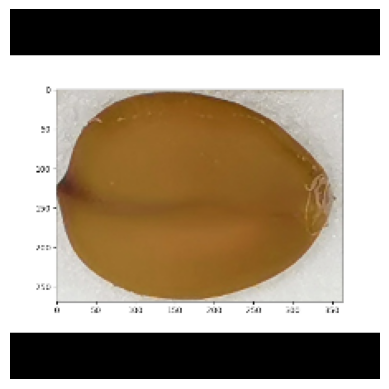

In [16]:
image = put_image_on_black_background('/kaggle/input/seed-classification/seed_classfication/image_classification/cassia_fistula/016_0.png')
image = cv2.resize(image, (224, 224))
plt.imshow(image)
plt.axis('off')
plt.show()

In [17]:
model = timm.create_model('eva02_base_patch14_224.mim_in22k', num_classes=20)

/opt/conda/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /usr/local/src/pytorch/aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [18]:
from fastai import *
from fastai.vision.all import *
from skimage import exposure, util

import random
from PIL import Image
import timm
import torch.nn as nn
from fastai.metrics import accuracy, F1Score

In [19]:
class CustomTransform(Transform):
    def __init__(self, process_example):
        self.process_example = process_example
    
    def encodes(self, img: Image.Image):
        return self.process_example(img)

In [20]:
def process_example(image):
    image = np.array(image)
    image = cv2.resize(image, (224, 224))
#     image = exposure.equalize_hist(image)
#     image = util.img_as_ubyte(image)
    image = Image.fromarray(image)
    
    return image

In [21]:
dls = ImageDataLoaders.from_folder(path = '/kaggle/input/seed-classification/seed_classfication/image_classification',
                                   seed = 42,
                                   valid_pct = 0.2,
                                   item_tfms = CustomTransform(process_example),
                                   batch_tfms = [*aug_transforms(size=224,mult = 1.2,flip_vert=True,max_warp=0.1, max_zoom=1.15, max_rotate=45.)],
                                   )

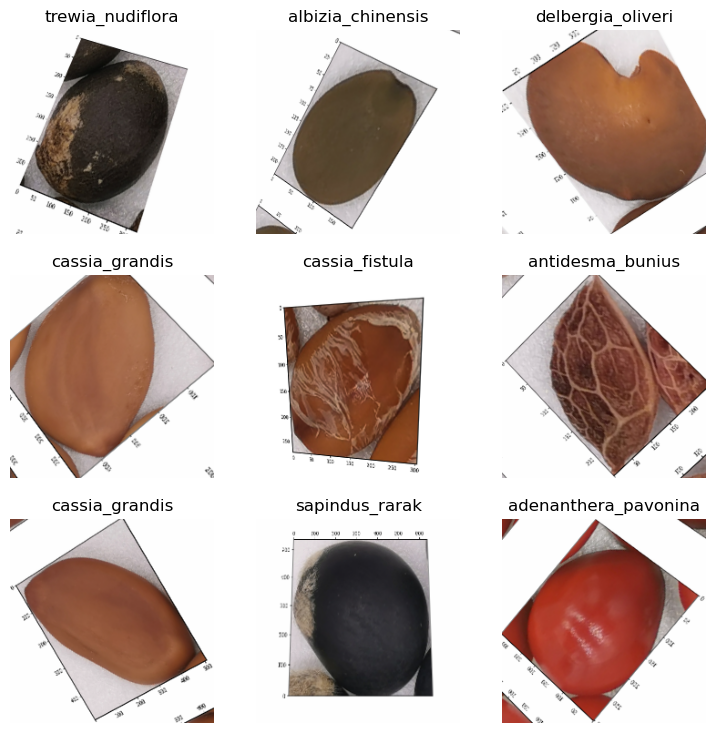

In [22]:
dls.show_batch()

In [23]:
f1score = F1Score(average="macro")

In [24]:
classfication_learner = Learner(dls,
                               model,
                               # pretrained = True,
                               metrics=[accuracy, f1score],
                               model_dir= '/kaggle/working/',
                               opt_func = ranger,
                               cbs=[ShowGraphCallback()]).to_fp16()

In [25]:
save_cb = SaveModelCallback(monitor='valid_loss', at_end=False, every_epoch=False, with_opt = True)
early_stop_cb = EarlyStoppingCallback(monitor='valid_loss',min_delta=0.001 ,patience=10)

# Create a list of callbacks
callbacks = [save_cb,early_stop_cb]

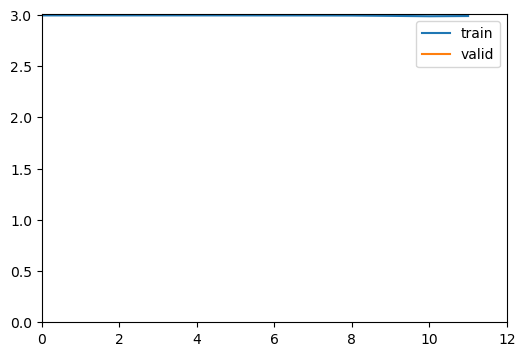

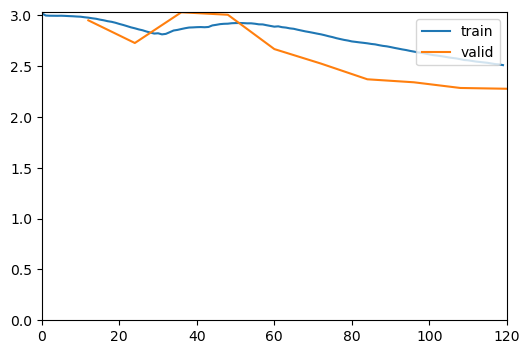

In [34]:
classfication_learner.fine_tune(10)

Better model found at epoch 0 with valid_loss value: 2.2585930824279785.


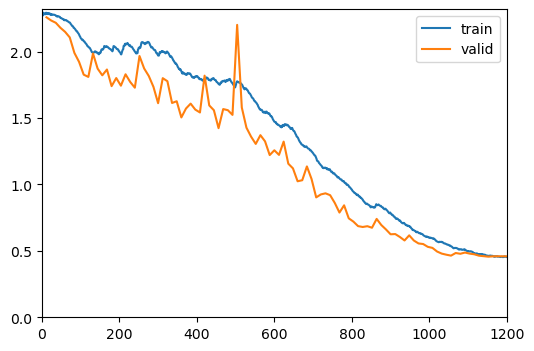

Better model found at epoch 1 with valid_loss value: 2.2346079349517822.
Better model found at epoch 2 with valid_loss value: 2.2174160480499268.
Better model found at epoch 3 with valid_loss value: 2.179562568664551.
Better model found at epoch 4 with valid_loss value: 2.1492042541503906.
Better model found at epoch 5 with valid_loss value: 2.1073532104492188.
Better model found at epoch 6 with valid_loss value: 1.990653157234192.
Better model found at epoch 7 with valid_loss value: 1.923310399055481.
Better model found at epoch 8 with valid_loss value: 1.826916217803955.
Better model found at epoch 9 with valid_loss value: 1.8097872734069824.
Better model found at epoch 14 with valid_loss value: 1.7403595447540283.
Better model found at epoch 19 with valid_loss value: 1.7286242246627808.
Better model found at epoch 24 with valid_loss value: 1.6119824647903442.
Better model found at epoch 29 with valid_loss value: 1.5047659873962402.
Better model found at epoch 37 with valid_loss valu

In [35]:
classfication_learner.fit_one_cycle(100, cbs=callbacks)

Better model found at epoch 0 with valid_loss value: 0.4541610777378082.


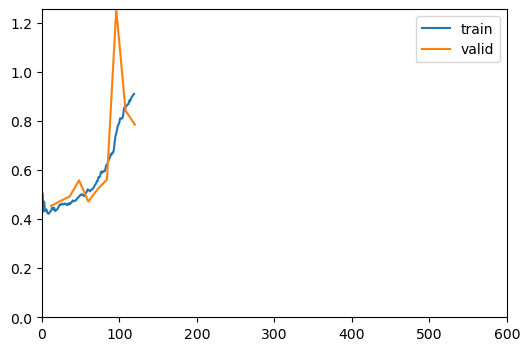

No improvement since epoch 0: early stopping


In [36]:
classfication_learner.fit_one_cycle(50, cbs=callbacks)

In [26]:
classfication_learner.load('/kaggle/input/seed-classification/classification_model/kaggle/working/model')

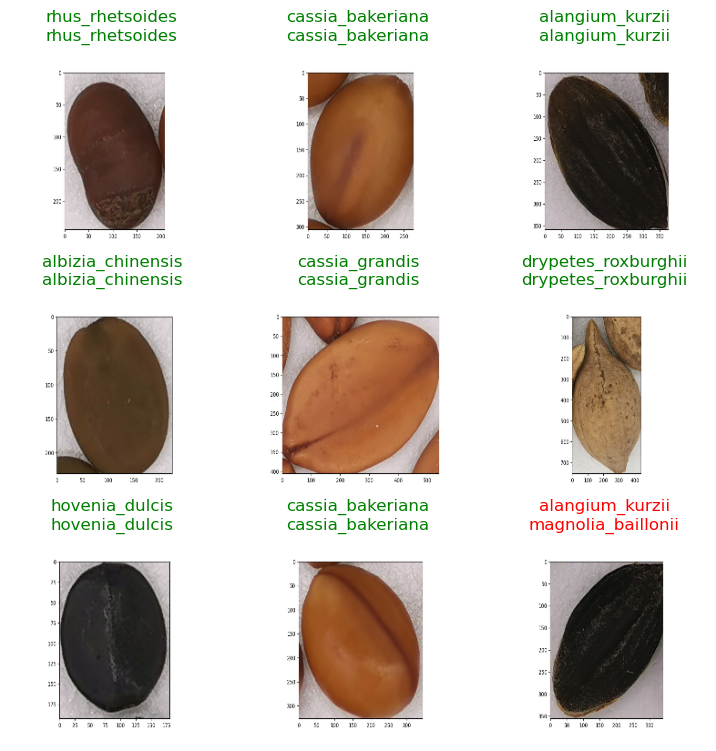

In [27]:
classfication_learner.show_results()

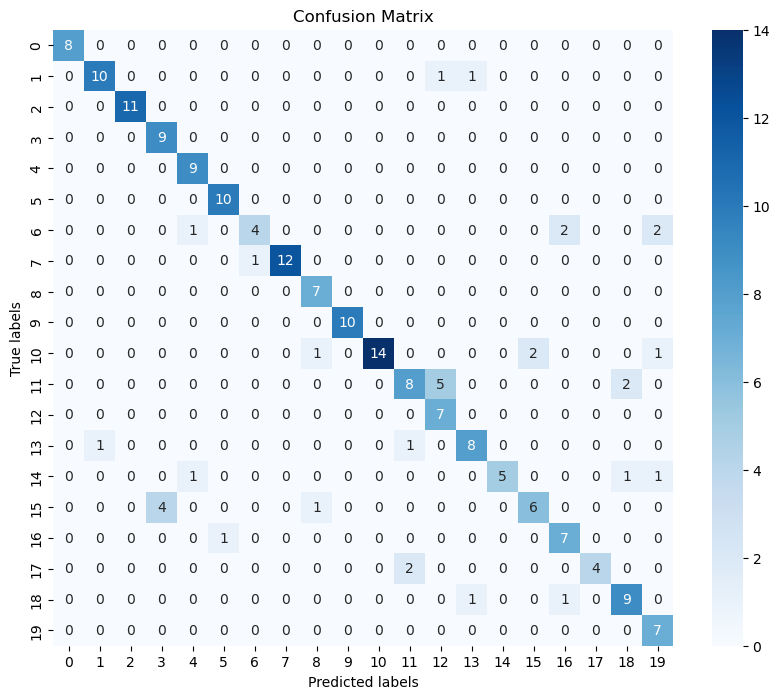

In [28]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Obtain predictions on validation dataset
preds, targets = classfication_learner.get_preds(ds_idx=1)

# Convert predictions and targets to class labels
pred_labels = preds.argmax(dim=1)
target_labels = targets

# Compute confusion matrix
cm = confusion_matrix(target_labels, pred_labels)

# Display confusion matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

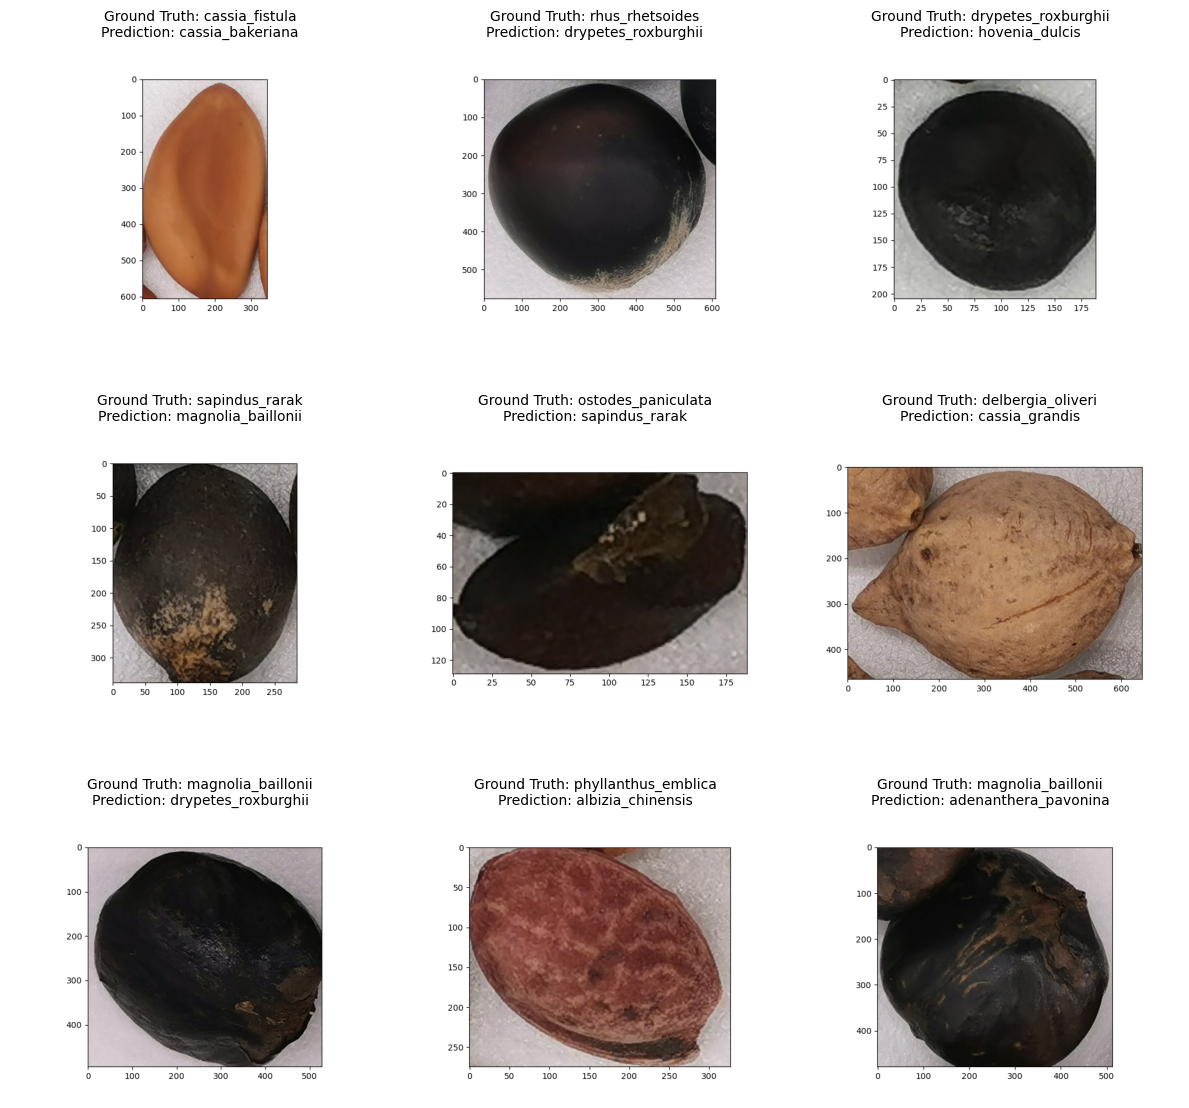

In [29]:
wrong_prediction_indices = torch.nonzero(target_labels != pred_labels, as_tuple=False).squeeze()

# Number of images to visualize (you can adjust this as needed)
num_images_to_visualize = 9

# Create a 3x3 subplot to display the wrong predictions
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

# Plot the wrong predictions
for i in range(num_images_to_visualize):
    index = wrong_prediction_indices[i].item()

    # Get the true label and predicted label for this image
    true_label = target_labels[index].item()
    predicted_label = pred_labels[index].item()

    # Get the image data for this index
    image, _ = dls.valid_ds[index]  # Access the validation dataset using dls.valid_ds

    # Plot the image along with its true and predicted labels
    ax = axs[i // 3, i % 3]
    ax.imshow(image)
    ax.set_title(f"Ground Truth: {class_names[true_label]}\nPrediction: {class_names[predicted_label]}", fontsize=10)
    ax.axis('off')

# Adjust layout for better readability
plt.tight_layout()
plt.show()

In [ ]:
read boundarybox_seed_train -> crop เอารูปมา padding เเล้วเอาไป train model classfication

In [ ]:
explore data

In [ ]:
train yolo

In [ ]:
yolo detect -> crop ออกมา padding -> classification -> count

# Yolo v8

In [30]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 607.6/607.6 kB 9.0 MB/s eta 0:00:00a 0:00:01


In [31]:
import ultralytics
from ultralytics import YOLO
ultralytics.checks()

Ultralytics YOLOv8.0.141 🚀 Python-3.10.10 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (2 CPUs, 15.6 GB RAM, 4958.8/8062.4 GB disk)


In [32]:
model = YOLO('yolov8x.pt')

100%|██████████| 131M/131M [00:00<00:00, 148MB/s]  


In [34]:
torch.cuda.empty_cache()

In [35]:
import gc
gc.collect()

0

In [44]:
import wandb
print(wandb.__path__)
print(wandb.__version__)

['/opt/conda/lib/python3.10/site-packages/wandb']
0.15.4


In [42]:
!pip install --force-reinstall wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.6 MB/s eta 0:00:0000:010:01
  Using cached click-8.1.6-py3-none-any.whl (97 kB)
  Using cached GitPython-3.1.32-py3-none-any.whl (188 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached psutil-5.9.5-cp36-abi3-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (282 kB)
  Using cached sentry_sdk-1.28.1-py2.py3-none-any.whl (214 kB)
  Using cached docker_pycreds-0.4.0-py2.py3-none-any.whl (9.0 kB)
  Using cached PyYAML-6.0.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (705 kB)
  Using cached pathtools-0.1.2-py3-none-any.whl
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 804.0/804.0 kB 30.0 MB/s eta 0:00:00
  Using cached protobuf-4.23.4-cp37-abi3-manylinux2014_x86_64.whl (304 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached gitdb-4.0.10-py3-none-any.whl (62 kB)
  Using cached charset_normalizer-3.2.0-cp310-cp310-manylinux_2_17_x86_6

In [45]:
wandb.init(mode="disabled")

In [46]:
model.train(data='/kaggle/input/my-roboflow-2-seed-counting/seed counting.v1i.yolov8/data.yaml', epochs=100, imgsz=224,batch = -1, patience = 5)

Ultralytics YOLOv8.0.141 🚀 Python-3.10.10 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/kaggle/input/my-roboflow-2-seed-counting/seed counting.v1i.yolov8/data.yaml, epochs=100, patience=5, batch=-1, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=Fa

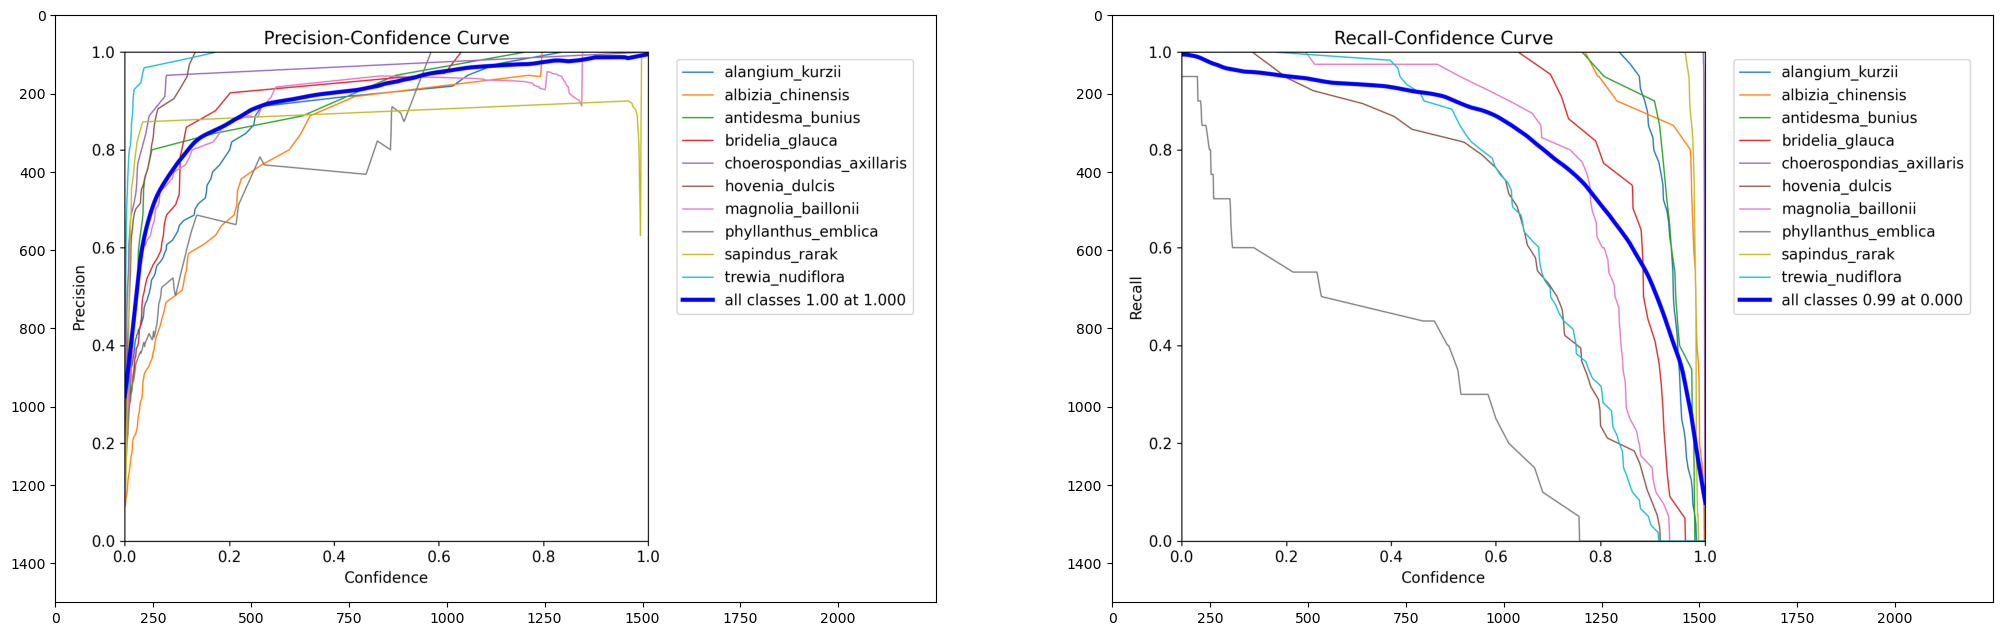

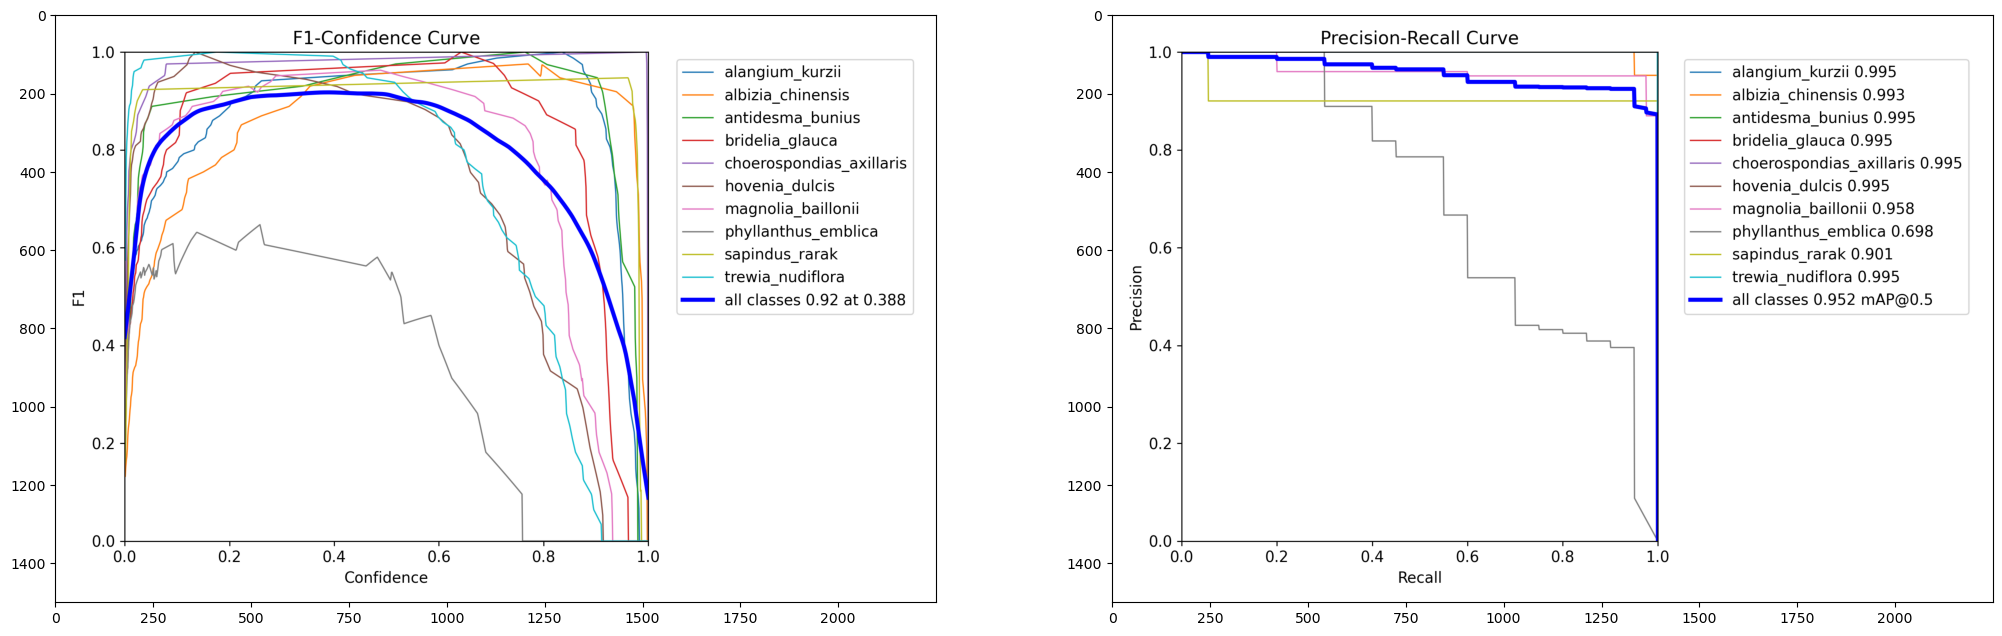

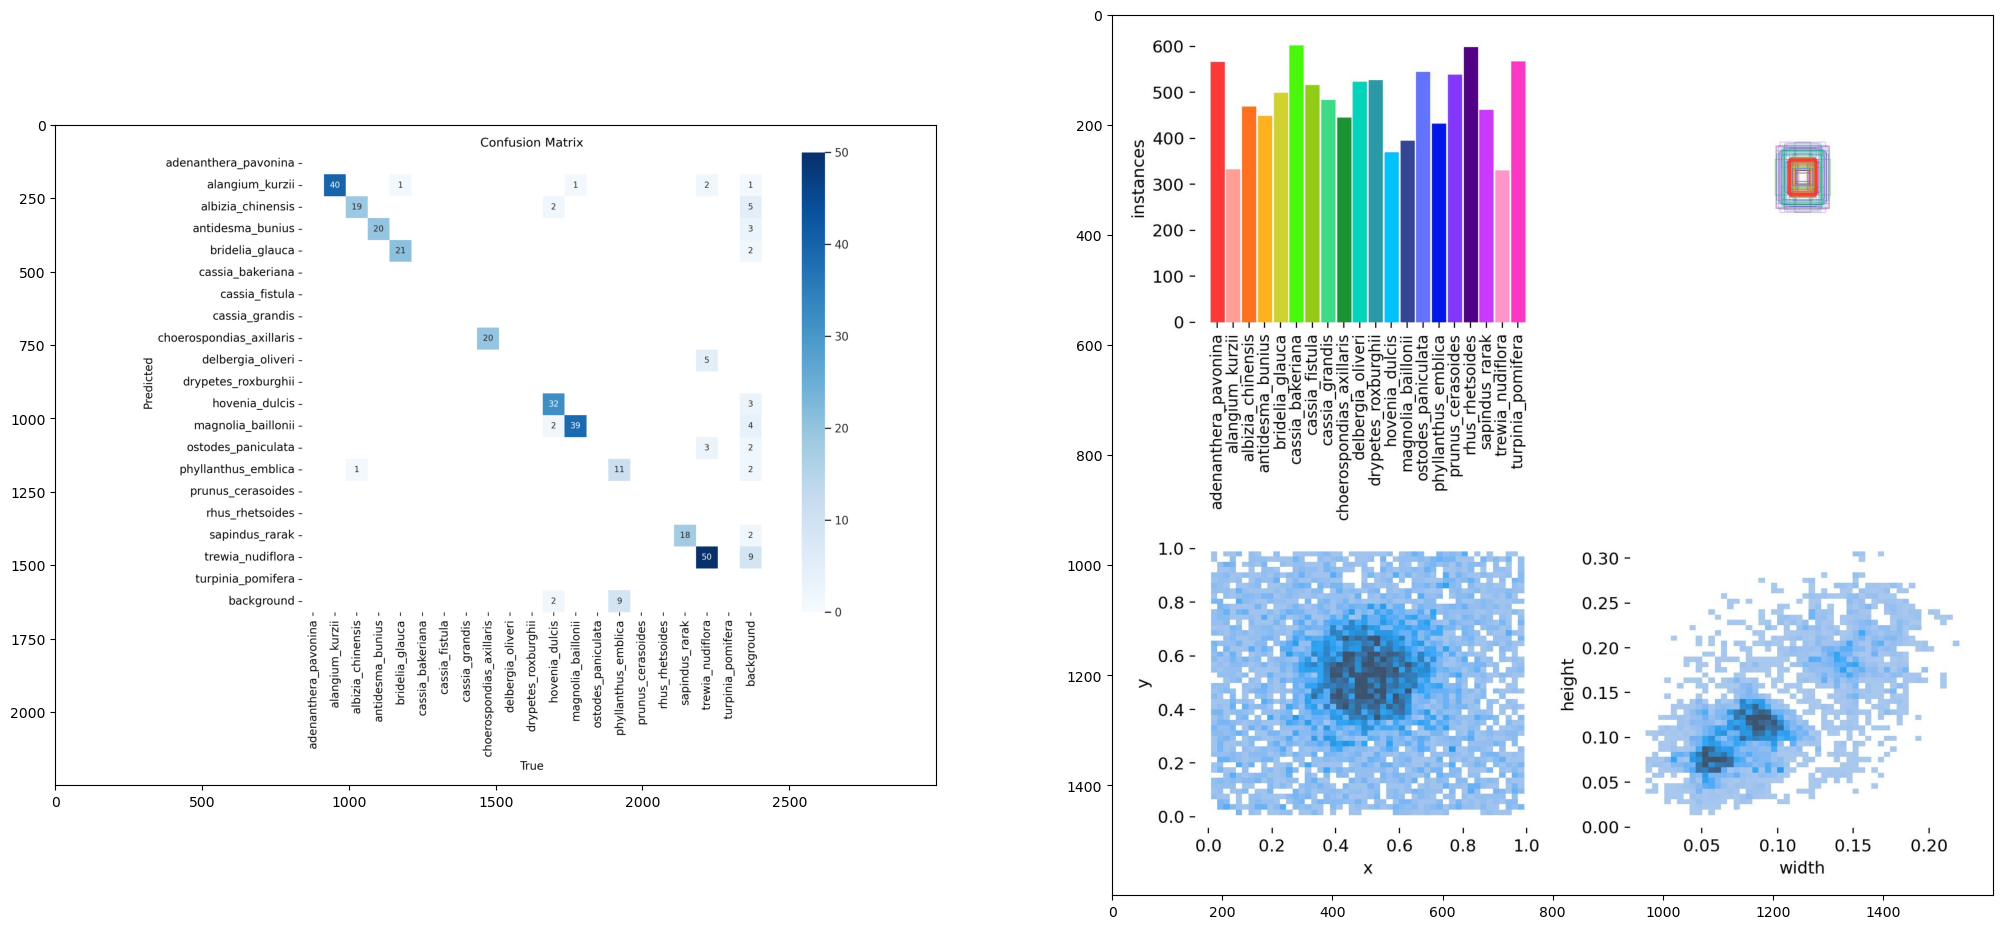

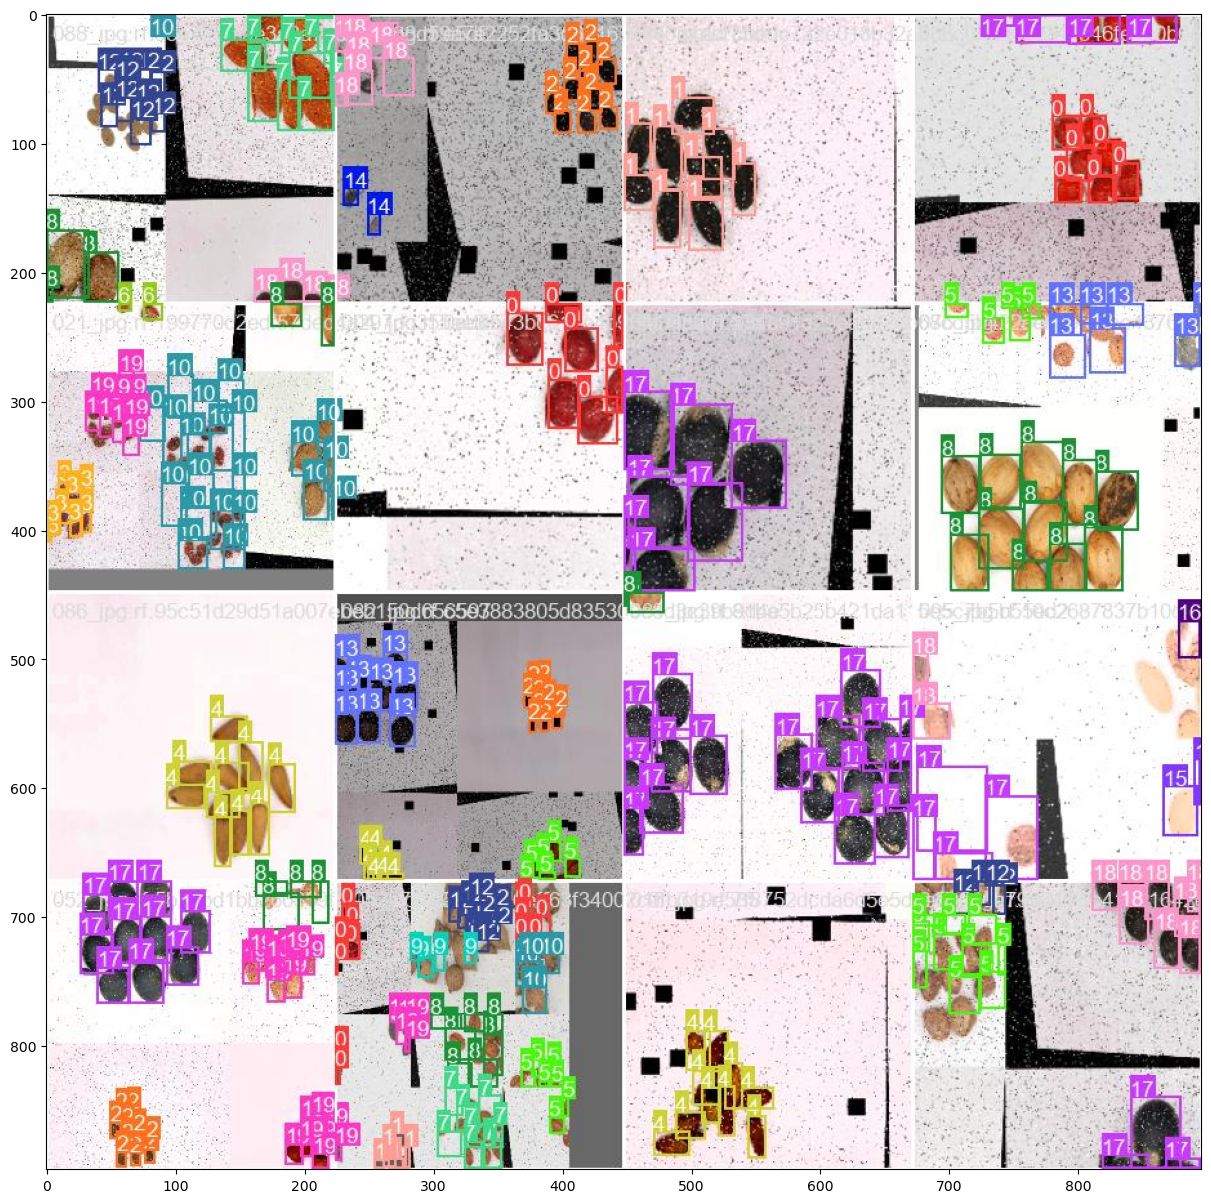

In [47]:
%matplotlib inline
model_path = '/kaggle/working/runs/detect/train3/'

def plot(ls, size):
    c=1
    plt.figure(figsize=(25,15))
    for im in ls:
        plt.subplot(size[0],size[1],c)
        im = plt.imread(model_path+im)
        plt.imshow(im)
        c+=1
    plt.show()

plot(['P_curve.png','R_curve.png'], (1,2))
plot(['F1_curve.png','PR_curve.png'], (1,2))
plot(['confusion_matrix.png','labels.jpg'], (1,2))
plot(['train_batch1.jpg'],(1,1))

In [48]:
model = YOLO('/kaggle/working/runs/detect/train3/weights/best.pt')  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered

Ultralytics YOLOv8.0.141 🚀 Python-3.10.10 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
/opt/conda/lib/python3.10/site-packages/ultralytics/utils/torch_utils.py:138: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#cublasApi_reproducibility (Triggered internally at /usr/local/src/pytorch/aten/src/ATen/Context.cpp:156.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/opt/conda/lib/python3.10/site-packages/ultralytics/utils/torch_utils.py:143: UserWarning: Deterministic behavior was enabled with either `torch.

In [49]:
results = model('/kaggle/input/superai-north-seed-detection/test/101.jpg')


image 1/1 /kaggle/input/superai-north-seed-detection/test/101.jpg: 192x224 3 adenanthera_pavoninas, 1 cassia_fistula, 2 cassia_grandiss, 1 choerospondias_axillaris, 1 delbergia_oliveri, 225.7ms
Speed: 1.4ms preprocess, 225.7ms inference, 10.5ms postprocess per image at shape (1, 3, 192, 224)


In [50]:
results[0].boxes

WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


ultralytics.engine.results.Boxes object with attributes:

boxes: tensor([[1.1761e+03, 9.9873e+02, 1.4651e+03, 1.2679e+03, 9.4494e-01, 0.0000e+00],
        [2.1788e+03, 9.0611e+02, 2.5111e+03, 1.2954e+03, 8.5633e-01, 7.0000e+00],
        [1.5085e+03, 6.5098e+02, 1.8335e+03, 1.0266e+03, 7.6488e-01, 9.0000e+00],
        [1.5357e+03, 1.3769e+03, 1.8338e+03, 1.7160e+03, 7.2418e-01, 0.0000e+00],
        [2.0575e+03, 1.4793e+03, 2.4142e+03, 1.7405e+03, 5.1058e-01, 6.0000e+00],
        [1.7425e+03, 1.7200e+03, 2.0820e+03, 2.0097e+03, 4.1956e-01, 8.0000e+00],
        [1.9748e+03, 1.0969e+03, 2.2874e+03, 1.4200e+03, 3.9551e-01, 7.0000e+00],
        [1.4323e+03, 1.1148e+03, 1.7175e+03, 1.4164e+03, 2.5497e-01, 0.0000e+00]], device='cuda:0')
cls: tensor([0., 7., 9., 0., 6., 8., 7., 0.], device='cuda:0')
conf: tensor([0.9449, 0.8563, 0.7649, 0.7242, 0.5106, 0.4196, 0.3955, 0.2550], device='cuda:0')
data: tensor([[1.1761e+03, 9.9873e+02, 1.4651e+03, 1.2679e+03, 9.4494e-01, 0.0000e+00],
        [2.178

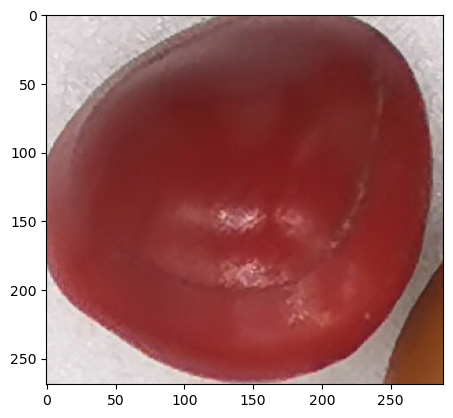

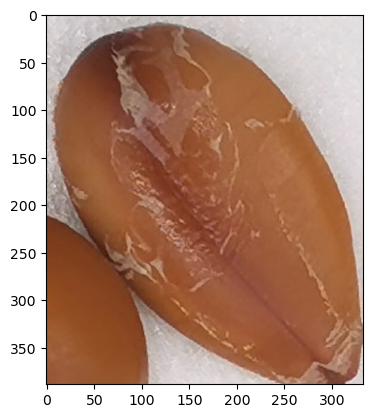

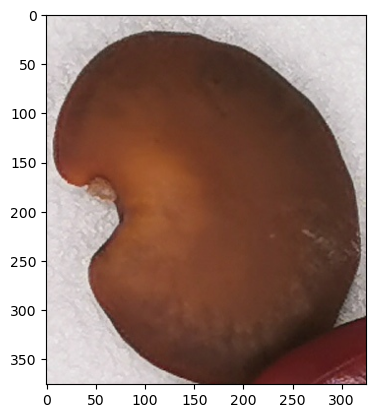

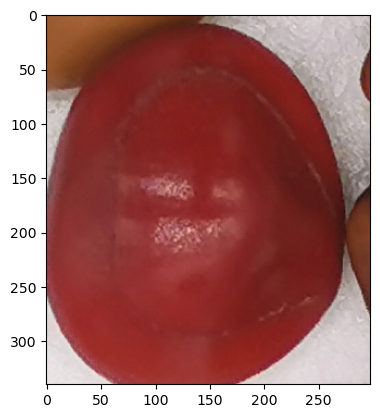

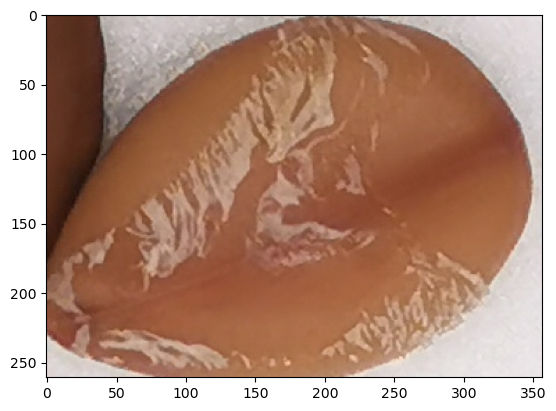

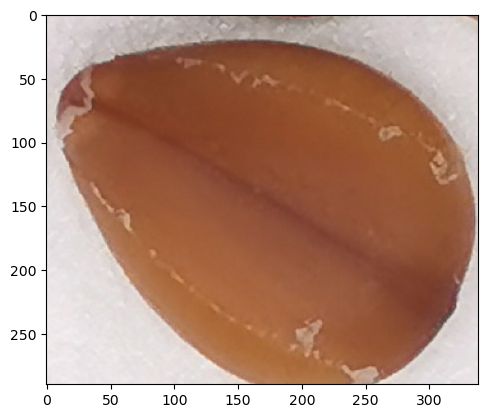

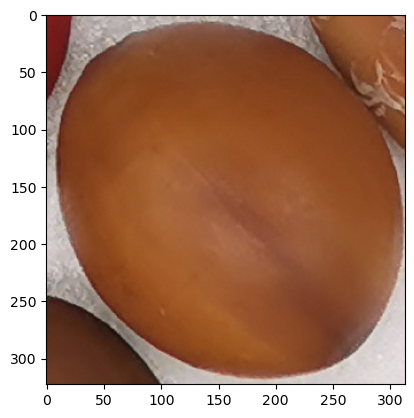

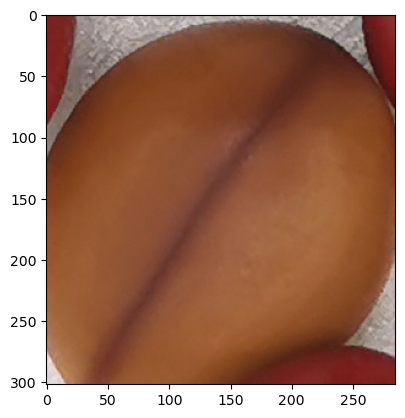

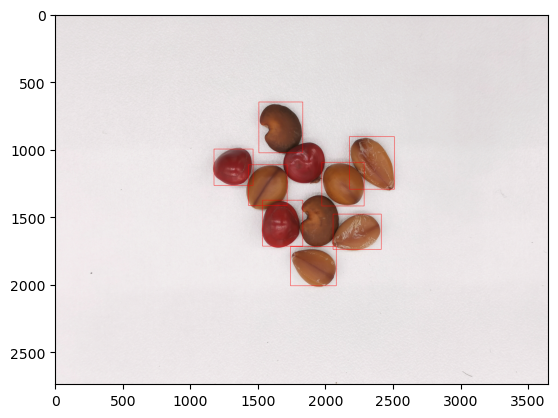

In [51]:
import cv2

def show_image_with_bounding_boxes(image_data, results):
    # Get the image from the result data (assuming it contains the image data)
    image = image_data
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Extract bounding box information
    boxes_xywh = results.boxes.xywh.cpu().numpy()
    conf_scores = results.boxes.conf.cpu().numpy()
    image_cropped = image.copy()
    for box_xywh, score in zip(boxes_xywh, conf_scores):
        x_center, y_center, width, height = box_xywh[:4]
        confidence = score

        # Calculate the top-left (x_min, y_min) and bottom-right (x_max, y_max) coordinates
        x_min = int((x_center - width / 2))
        y_min = int((y_center - height / 2))
        x_max = int((x_center + width / 2))
        y_max = int((y_center + height / 2))
#         print(x_min, y_min, x_max, y_max)
        # Draw bounding box with OpenCV
    
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
        plt.imshow(image_cropped[y_min:y_max, x_min:x_max])
        plt.show()

    # Show the image with bounding boxes
    plt.imshow(image)
    plt.show()

# Assuming 'results[0].xywh', 'results[0].scores', and 'results[0].labels' contain the bounding box information
# Assuming 'results[0].orig_img' contains the image data
show_image_with_bounding_boxes(results[0].orig_img, results[0])


In [103]:
def put_cropped_on_white_background(image, target_size=(1000, 1000)):
    # Get the original image size
    height, width, _ = image.shape

    # Create a black background of the target size
    background = np.zeros((target_size[1], target_size[0], 3), dtype=np.uint8)
    background[:, :, :] = (255, 255, 255)

    # Calculate the coordinates to paste the original image on the black background
    x_offset = (target_size[0] - width) // 2
    y_offset = (target_size[1] - height) // 2

    # Paste the original image on the black background
    background[y_offset:y_offset + height, x_offset:x_offset + width] = image

    return background

In [107]:
background = np.zeros((640, 640, 3), dtype=np.uint8)
def catch_seed(image_path, target_size=(640, 640)):
    # Get the image from the result data (assuming it contains the image data)
    seed = []
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = model(image_path, conf = 0.1,boxes = False)
    results = results[0]
    # Extract bounding box information
    boxes_xywh = results.boxes.xywh.cpu().numpy()
    conf_scores = results.boxes.conf.cpu().numpy()
    image_cropped = image.copy()
    for box_xywh in boxes_xywh:
        x_center, y_center, width, height = box_xywh[:4]

        # Calculate the top-left (x_min, y_min) and bottom-right (x_max, y_max) coordinates
        x_min = int((x_center - width / 2))
        y_min = int((y_center - height / 2))
        x_max = int((x_center + width / 2))
        y_max = int((y_center + height / 2))
#         print(x_min, y_min, x_max, y_max)
        # Draw bounding box with OpenCV
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
        cropped = image_cropped[y_min:y_max, x_min:x_max]
#         plt.imshow(cropped)
#         plt.show()
        cropped = put_cropped_on_white_background(cropped)
        cropped = cv2.resize(cropped, (224, 224))
        result = classfication_learner.predict(cropped)
        seed.append(result[0])
#         print(result)
#         plt.imshow(cropped)
#         plt.show()
        
#     plt.imshow(image)
#     plt.show()
    return seed
#         

In [108]:
from glob import glob
from tqdm import tqdm

In [ ]:
result = {}
for image_test_path in tqdm(glob('/kaggle/input/superai-north-seed-detection/test/*.jpg')):
    seed = catch_seed(image_test_path)
    result[image_test_path.split('/')[-1]] = seed

  0%|          | 0/100 [00:00<?, ?it/s]
image 1/1 /kaggle/input/superai-north-seed-detection/test/150.jpg: 192x224 1 cassia_grandis, 10 choerospondias_axillariss, 1 delbergia_oliveri, 23.0ms
Speed: 1.2ms preprocess, 23.0ms inference, 2.3ms postprocess per image at shape (1, 3, 192, 224)


  1%|          | 1/100 [00:01<02:07,  1.29s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/109.jpg: 192x224 1 adenanthera_pavonina, 1 cassia_fistula, 11 cassia_grandiss, 22.9ms
Speed: 1.1ms preprocess, 22.9ms inference, 1.8ms postprocess per image at shape (1, 3, 192, 224)


  2%|▏         | 2/100 [00:02<02:10,  1.33s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/149.jpg: 192x224 2 alangium_kurziis, 5 bridelia_glaucas, 5 cassia_fistulas, 1 choerospondias_axillaris, 1 delbergia_oliveri, 1 magnolia_baillonii, 1 turpinia_pomifera, 22.9ms
Speed: 1.0ms preprocess, 22.9ms inference, 1.8ms postprocess per image at shape (1, 3, 192, 224)


  3%|▎         | 3/100 [00:04<02:21,  1.46s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/187.jpg: 192x224 1 adenanthera_pavonina, 1 bridelia_glauca, 1 cassia_bakeriana, 7 cassia_fistulas, 1 rhus_rhetsoides, 22.9ms
Speed: 1.0ms preprocess, 22.9ms inference, 1.9ms postprocess per image at shape (1, 3, 192, 224)


  4%|▍         | 4/100 [00:05<02:09,  1.35s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/182.jpg: 192x224 7 alangium_kurziis, 1 bridelia_glauca, 2 cassia_fistulas, 4 delbergia_oliveris, 1 drypetes_roxburghii, 23.0ms
Speed: 1.1ms preprocess, 23.0ms inference, 1.9ms postprocess per image at shape (1, 3, 192, 224)


  5%|▌         | 5/100 [00:06<02:14,  1.42s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/185.jpg: 192x224 9 choerospondias_axillariss, 4 delbergia_oliveris, 23.0ms
Speed: 1.0ms preprocess, 23.0ms inference, 1.8ms postprocess per image at shape (1, 3, 192, 224)


  6%|▌         | 6/100 [00:08<02:13,  1.42s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/153.jpg: 192x224 6 alangium_kurziis, 5 choerospondias_axillariss, 1 ostodes_paniculata, 22.9ms
Speed: 1.0ms preprocess, 22.9ms inference, 2.1ms postprocess per image at shape (1, 3, 192, 224)


  7%|▋         | 7/100 [00:09<02:08,  1.38s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/189.jpg: 192x224 3 cassia_bakerianas, 1 cassia_grandis, 2 choerospondias_axillariss, 8 delbergia_oliveris, 22.9ms
Speed: 1.1ms preprocess, 22.9ms inference, 2.0ms postprocess per image at shape (1, 3, 192, 224)


  8%|▊         | 8/100 [00:11<02:09,  1.41s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/143.jpg: 192x224 1 alangium_kurzii, 1 cassia_bakeriana, 2 cassia_grandiss, 4 choerospondias_axillariss, 1 delbergia_oliveri, 4 ostodes_paniculatas, 23.0ms
Speed: 1.1ms preprocess, 23.0ms inference, 1.9ms postprocess per image at shape (1, 3, 192, 224)


  9%|▉         | 9/100 [00:12<02:05,  1.38s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/115.jpg: 192x224 9 bridelia_glaucas, 6 cassia_fistulas, 22.9ms
Speed: 1.1ms preprocess, 22.9ms inference, 1.9ms postprocess per image at shape (1, 3, 192, 224)


 10%|█         | 10/100 [00:14<02:07,  1.42s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/131.jpg: 192x224 9 choerospondias_axillariss, 2 delbergia_oliveris, 23.0ms
Speed: 1.1ms preprocess, 23.0ms inference, 2.0ms postprocess per image at shape (1, 3, 192, 224)


 11%|█         | 11/100 [00:15<01:59,  1.35s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/151.jpg: 192x224 1 adenanthera_pavonina, 4 alangium_kurziis, 5 bridelia_glaucas, 6 cassia_fistulas, 22.9ms
Speed: 1.0ms preprocess, 22.9ms inference, 2.0ms postprocess per image at shape (1, 3, 192, 224)


 12%|█▏        | 12/100 [00:16<02:05,  1.42s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/118.jpg: 192x224 2 adenanthera_pavoninas, 3 choerospondias_axillariss, 3 delbergia_oliveris, 3 ostodes_paniculatas, 4 sapindus_raraks, 22.9ms
Speed: 1.0ms preprocess, 22.9ms inference, 2.0ms postprocess per image at shape (1, 3, 192, 224)


 13%|█▎        | 13/100 [00:18<02:07,  1.46s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/176.jpg: 192x224 1 bridelia_glauca, 10 cassia_grandiss, 3 drypetes_roxburghiis, 23.0ms
Speed: 1.0ms preprocess, 23.0ms inference, 1.8ms postprocess per image at shape (1, 3, 192, 224)


 14%|█▍        | 14/100 [00:19<02:05,  1.46s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/106.jpg: 192x224 10 cassia_fistulas, 22.9ms
Speed: 1.1ms preprocess, 22.9ms inference, 1.9ms postprocess per image at shape (1, 3, 192, 224)


 15%|█▌        | 15/100 [00:20<01:54,  1.35s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/163.jpg: 192x224 1 cassia_fistula, 1 choerospondias_axillaris, 1 delbergia_oliveri, 8 drypetes_roxburghiis, 22.9ms
Speed: 1.0ms preprocess, 22.9ms inference, 1.9ms postprocess per image at shape (1, 3, 192, 224)


 16%|█▌        | 16/100 [00:22<01:48,  1.30s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/113.jpg: 192x224 1 cassia_fistula, 9 cassia_grandiss, 2 delbergia_oliveris, 23.0ms
Speed: 1.0ms preprocess, 23.0ms inference, 1.9ms postprocess per image at shape (1, 3, 192, 224)


 17%|█▋        | 17/100 [00:23<01:46,  1.28s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/160.jpg: 192x224 3 adenanthera_pavoninas, 1 antidesma_bunius, 2 choerospondias_axillariss, 5 delbergia_oliveris, 1 prunus_cerasoides, 2 sapindus_raraks, 23.0ms
Speed: 1.1ms preprocess, 23.0ms inference, 1.8ms postprocess per image at shape (1, 3, 192, 224)


 18%|█▊        | 18/100 [00:24<01:48,  1.32s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/197.jpg: 192x224 11 choerospondias_axillariss, 1 delbergia_oliveri, 1 drypetes_roxburghii, 1 ostodes_paniculata, 22.9ms
Speed: 1.0ms preprocess, 22.9ms inference, 2.3ms postprocess per image at shape (1, 3, 192, 224)


 19%|█▉        | 19/100 [00:26<01:58,  1.46s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/178.jpg: 192x224 3 bridelia_glaucas, 1 cassia_fistula, 2 choerospondias_axillariss, 2 delbergia_oliveris, 5 drypetes_roxburghiis, 23.0ms
Speed: 1.2ms preprocess, 23.0ms inference, 2.4ms postprocess per image at shape (1, 3, 192, 224)


 20%|██        | 20/100 [00:28<02:01,  1.52s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/130.jpg: 192x224 1 choerospondias_axillaris, 11 drypetes_roxburghiis, 1 ostodes_paniculata, 1 sapindus_rarak, 22.9ms
Speed: 1.0ms preprocess, 22.9ms inference, 1.9ms postprocess per image at shape (1, 3, 192, 224)


 21%|██        | 21/100 [00:29<01:56,  1.48s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/156.jpg: 192x224 9 bridelia_glaucas, 5 cassia_fistulas, 22.9ms
Speed: 1.1ms preprocess, 22.9ms inference, 1.9ms postprocess per image at shape (1, 3, 192, 224)


 22%|██▏       | 22/100 [00:30<01:54,  1.47s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/120.jpg: 192x224 5 alangium_kurziis, 3 bridelia_glaucas, 7 cassia_fistulas, 22.9ms
Speed: 1.1ms preprocess, 22.9ms inference, 1.8ms postprocess per image at shape (1, 3, 192, 224)


 23%|██▎       | 23/100 [00:32<01:54,  1.48s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/190.jpg: 192x224 4 alangium_kurziis, 8 choerospondias_axillariss, 4 ostodes_paniculatas, 22.9ms
Speed: 1.0ms preprocess, 22.9ms inference, 1.8ms postprocess per image at shape (1, 3, 192, 224)


 24%|██▍       | 24/100 [00:34<01:54,  1.51s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/124.jpg: 192x224 2 adenanthera_pavoninas, 8 choerospondias_axillariss, 2 sapindus_raraks, 22.9ms
Speed: 1.1ms preprocess, 22.9ms inference, 1.8ms postprocess per image at shape (1, 3, 192, 224)


 25%|██▌       | 25/100 [00:35<01:47,  1.43s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/191.jpg: 192x224 4 alangium_kurziis, 8 bridelia_glaucas, 4 cassia_fistulas, 23.0ms
Speed: 1.1ms preprocess, 23.0ms inference, 2.0ms postprocess per image at shape (1, 3, 192, 224)


 26%|██▌       | 26/100 [00:36<01:49,  1.48s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/188.jpg: 192x224 2 alangium_kurziis, 4 bridelia_glaucas, 2 cassia_fistulas, 5 cassia_grandiss, 1 choerospondias_axillaris, 1 drypetes_roxburghii, 22.9ms
Speed: 1.1ms preprocess, 22.9ms inference, 1.8ms postprocess per image at shape (1, 3, 192, 224)


 27%|██▋       | 27/100 [00:38<01:50,  1.51s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/123.jpg: 192x224 4 choerospondias_axillariss, 3 delbergia_oliveris, 2 sapindus_raraks, 1 trewia_nudiflora, 22.9ms
Speed: 1.0ms preprocess, 22.9ms inference, 1.9ms postprocess per image at shape (1, 3, 192, 224)


 28%|██▊       | 28/100 [00:39<01:40,  1.39s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/167.jpg: 192x224 8 alangium_kurziis, 3 choerospondias_axillariss, 2 ostodes_paniculatas, 1 sapindus_rarak, 22.9ms
Speed: 1.1ms preprocess, 22.9ms inference, 1.8ms postprocess per image at shape (1, 3, 192, 224)


 29%|██▉       | 29/100 [00:41<01:40,  1.41s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/112.jpg: 192x224 2 alangium_kurziis, 5 bridelia_glaucas, 8 cassia_fistulas, 22.9ms
Speed: 1.1ms preprocess, 22.9ms inference, 2.0ms postprocess per image at shape (1, 3, 192, 224)


 30%|███       | 30/100 [00:42<01:41,  1.44s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/193.jpg: 192x224 1 bridelia_glauca, 1 ostodes_paniculata, 9 prunus_cerasoidess, 22.9ms
Speed: 1.1ms preprocess, 22.9ms inference, 1.9ms postprocess per image at shape (1, 3, 192, 224)


 31%|███       | 31/100 [00:43<01:34,  1.37s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/152.jpg: 192x224 8 alangium_kurziis, 3 cassia_grandiss, 2 delbergia_oliveris, 1 drypetes_roxburghii, 23.0ms
Speed: 1.0ms preprocess, 23.0ms inference, 2.0ms postprocess per image at shape (1, 3, 192, 224)


 32%|███▏      | 32/100 [00:45<01:34,  1.39s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/192.jpg: 192x224 4 alangium_kurziis, 2 choerospondias_axillariss, 3 delbergia_oliveris, 3 drypetes_roxburghiis, 1 ostodes_paniculata, 1 trewia_nudiflora, 22.9ms
Speed: 1.0ms preprocess, 22.9ms inference, 1.8ms postprocess per image at shape (1, 3, 192, 224)


 33%|███▎      | 33/100 [00:46<01:33,  1.40s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/101.jpg: 192x224 4 adenanthera_pavoninas, 1 cassia_fistula, 3 cassia_grandiss, 1 choerospondias_axillaris, 2 delbergia_oliveris, 22.9ms
Speed: 1.0ms preprocess, 22.9ms inference, 1.9ms postprocess per image at shape (1, 3, 192, 224)


 34%|███▍      | 34/100 [00:47<01:27,  1.33s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/177.jpg: 192x224 8 alangium_kurziis, 6 bridelia_glaucas, 1 drypetes_roxburghii, 2 ostodes_paniculatas, 23.0ms
Speed: 1.2ms preprocess, 23.0ms inference, 2.4ms postprocess per image at shape (1, 3, 192, 224)


 35%|███▌      | 35/100 [00:49<01:33,  1.44s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/186.jpg: 192x224 6 alangium_kurziis, 6 bridelia_glaucas, 1 magnolia_baillonii, 23.0ms
Speed: 1.1ms preprocess, 23.0ms inference, 1.8ms postprocess per image at shape (1, 3, 192, 224)


 36%|███▌      | 36/100 [00:50<01:30,  1.41s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/117.jpg: 192x224 9 alangium_kurziis, 2 bridelia_glaucas, 23.0ms
Speed: 1.1ms preprocess, 23.0ms inference, 1.9ms postprocess per image at shape (1, 3, 192, 224)


 37%|███▋      | 37/100 [00:52<01:24,  1.35s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/137.jpg: 192x224 10 bridelia_glaucas, 23.1ms
Speed: 1.1ms preprocess, 23.1ms inference, 1.9ms postprocess per image at shape (1, 3, 192, 224)


 38%|███▊      | 38/100 [00:53<01:19,  1.29s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/127.jpg: 192x224 1 cassia_grandis, 9 choerospondias_axillariss, 2 drypetes_roxburghiis, 23.0ms
Speed: 1.2ms preprocess, 23.0ms inference, 2.1ms postprocess per image at shape (1, 3, 192, 224)


 39%|███▉      | 39/100 [00:54<01:18,  1.28s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/196.jpg: 192x224 5 alangium_kurziis, 3 bridelia_glaucas, 1 cassia_fistula, 5 choerospondias_axillariss, 1 sapindus_rarak, 22.9ms
Speed: 1.0ms preprocess, 22.9ms inference, 1.9ms postprocess per image at shape (1, 3, 192, 224)


 40%|████      | 40/100 [00:56<01:21,  1.36s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/140.jpg: 192x224 2 adenanthera_pavoninas, 3 choerospondias_axillariss, 3 ostodes_paniculatas, 2 sapindus_raraks, 22.9ms
Speed: 1.0ms preprocess, 22.9ms inference, 1.8ms postprocess per image at shape (1, 3, 192, 224)


 41%|████      | 41/100 [00:57<01:16,  1.29s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/179.jpg: 192x224 7 bridelia_glaucas, 7 cassia_fistulas, 23.6ms
Speed: 1.5ms preprocess, 23.6ms inference, 2.7ms postprocess per image at shape (1, 3, 192, 224)


 42%|████▏     | 42/100 [00:59<01:27,  1.50s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/105.jpg: 192x224 3 adenanthera_pavoninas, 1 choerospondias_axillaris, 3 delbergia_oliveris, 1 ostodes_paniculata, 4 prunus_cerasoidess, 23.0ms
Speed: 1.1ms preprocess, 23.0ms inference, 2.0ms postprocess per image at shape (1, 3, 192, 224)


 43%|████▎     | 43/100 [01:00<01:21,  1.43s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/111.jpg: 192x224 1 adenanthera_pavonina, 11 cassia_fistulas, 22.9ms
Speed: 1.0ms preprocess, 22.9ms inference, 1.8ms postprocess per image at shape (1, 3, 192, 224)


 44%|████▍     | 44/100 [01:01<01:17,  1.39s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/145.jpg: 192x224 4 alangium_kurziis, 1 cassia_grandis, 3 choerospondias_axillariss, 2 sapindus_raraks, 22.9ms
Speed: 1.0ms preprocess, 22.9ms inference, 1.9ms postprocess per image at shape (1, 3, 192, 224)


 45%|████▌     | 45/100 [01:02<01:11,  1.30s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/135.jpg: 192x224 4 alangium_kurziis, 4 cassia_grandiss, 9 choerospondias_axillariss, 23.0ms
Speed: 1.0ms preprocess, 23.0ms inference, 1.9ms postprocess per image at shape (1, 3, 192, 224)


 46%|████▌     | 46/100 [01:04<01:16,  1.41s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/166.jpg: 192x224 9 alangium_kurziis, 1 cassia_fistula, 2 cassia_grandiss, 1 delbergia_oliveri, 23.0ms
Speed: 1.0ms preprocess, 23.0ms inference, 2.0ms postprocess per image at shape (1, 3, 192, 224)


 47%|████▋     | 47/100 [01:05<01:14,  1.40s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/159.jpg: 192x224 3 alangium_kurziis, 5 cassia_fistulas, 4 choerospondias_axillariss, 23.0ms
Speed: 1.1ms preprocess, 23.0ms inference, 2.0ms postprocess per image at shape (1, 3, 192, 224)


 48%|████▊     | 48/100 [01:07<01:10,  1.36s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/121.jpg: 192x224 10 choerospondias_axillariss, 22.9ms
Speed: 1.1ms preprocess, 22.9ms inference, 1.8ms postprocess per image at shape (1, 3, 192, 224)


 49%|████▉     | 49/100 [01:08<01:06,  1.31s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/173.jpg: 192x224 3 cassia_grandiss, 10 choerospondias_axillariss, 22.9ms
Speed: 1.1ms preprocess, 22.9ms inference, 1.8ms postprocess per image at shape (1, 3, 192, 224)


 50%|█████     | 50/100 [01:09<01:06,  1.32s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/171.jpg: 192x224 11 cassia_grandiss, 1 delbergia_oliveri, 22.9ms
Speed: 1.0ms preprocess, 22.9ms inference, 1.8ms postprocess per image at shape (1, 3, 192, 224)


 51%|█████     | 51/100 [01:10<01:04,  1.31s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/103.jpg: 192x224 3 adenanthera_pavoninas, 1 bridelia_glauca, 1 cassia_bakeriana, 2 cassia_grandiss, 4 prunus_cerasoidess, 1 turpinia_pomifera, 22.9ms
Speed: 1.0ms preprocess, 22.9ms inference, 2.0ms postprocess per image at shape (1, 3, 192, 224)


 52%|█████▏    | 52/100 [01:12<01:02,  1.30s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/174.jpg: 192x224 1 adenanthera_pavonina, 11 cassia_grandiss, 23.0ms
Speed: 1.0ms preprocess, 23.0ms inference, 1.9ms postprocess per image at shape (1, 3, 192, 224)


 53%|█████▎    | 53/100 [01:13<01:00,  1.29s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/199.jpg: 192x224 3 bridelia_glaucas, 10 cassia_fistulas, 1 cassia_grandis, 22.9ms
Speed: 1.0ms preprocess, 22.9ms inference, 1.9ms postprocess per image at shape (1, 3, 192, 224)


 54%|█████▍    | 54/100 [01:14<01:01,  1.33s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/126.jpg: 192x224 1 cassia_grandis, 6 choerospondias_axillariss, 8 drypetes_roxburghiis, 22.9ms
Speed: 1.0ms preprocess, 22.9ms inference, 1.8ms postprocess per image at shape (1, 3, 192, 224)


 55%|█████▌    | 55/100 [01:16<01:02,  1.38s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/142.jpg: 192x224 3 alangium_kurziis, 8 bridelia_glaucas, 5 cassia_fistulas, 1 delbergia_oliveri, 22.9ms
Speed: 1.0ms preprocess, 22.9ms inference, 1.8ms postprocess per image at shape (1, 3, 192, 224)


 56%|█████▌    | 56/100 [01:18<01:05,  1.48s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/169.jpg: 192x224 1 cassia_grandis, 7 choerospondias_axillariss, 3 drypetes_roxburghiis, 3 ostodes_paniculatas, 23.0ms
Speed: 1.0ms preprocess, 23.0ms inference, 1.9ms postprocess per image at shape (1, 3, 192, 224)


 57%|█████▋    | 57/100 [01:19<01:02,  1.46s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/194.jpg: 192x224 5 alangium_kurziis, 3 cassia_grandiss, 5 choerospondias_axillariss, 1 drypetes_roxburghii, 23.0ms
Speed: 1.0ms preprocess, 23.0ms inference, 1.8ms postprocess per image at shape (1, 3, 192, 224)


 58%|█████▊    | 58/100 [01:20<01:00,  1.44s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/180.jpg: 192x224 5 adenanthera_pavoninas, 1 alangium_kurzii, 3 bridelia_glaucas, 2 choerospondias_axillariss, 2 drypetes_roxburghiis, 2 sapindus_raraks, 22.9ms
Speed: 0.9ms preprocess, 22.9ms inference, 2.0ms postprocess per image at shape (1, 3, 192, 224)


 59%|█████▉    | 59/100 [01:22<00:59,  1.45s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/104.jpg: 192x224 5 adenanthera_pavoninas, 3 choerospondias_axillariss, 2 delbergia_oliveris, 1 ostodes_paniculata, 22.9ms
Speed: 1.0ms preprocess, 22.9ms inference, 2.3ms postprocess per image at shape (1, 3, 192, 224)


 60%|██████    | 60/100 [01:23<00:54,  1.37s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/155.jpg: 192x224 11 alangium_kurziis, 3 choerospondias_axillariss, 1 sapindus_rarak, 23.0ms
Speed: 1.0ms preprocess, 23.0ms inference, 1.8ms postprocess per image at shape (1, 3, 192, 224)


 61%|██████    | 61/100 [01:25<00:54,  1.41s/it]
image 1/1 /kaggle/input/superai-north-seed-detection/test/158.jpg: 192x224 1 cassia_fistula, 10 cassia_grandiss, 1 choerospondias_axillaris, 1 delbergia_oliveri, 1 prunus_cerasoides, 22.9ms
Speed: 1.0ms preprocess, 22.9ms inference, 1.9ms postprocess per image at shape (1, 3, 192, 224)


In [119]:
from collections import Counter
for image_name in result:
    print(image_name, Counter(result[image_name]))
    break

150.jpg Counter({'prunus_cerasoides': 4, 'antidesma_bunius': 3, 'cassia_fistula': 2, 'cassia_grandis': 1, 'choerospondias_axillaris': 1, 'drypetes_roxburghii': 1})


In [122]:
result

{'150.jpg': ['prunus_cerasoides',
  'cassia_grandis',
  'prunus_cerasoides',
  'prunus_cerasoides',
  'antidesma_bunius',
  'choerospondias_axillaris',
  'cassia_fistula',
  'cassia_fistula',
  'prunus_cerasoides',
  'drypetes_roxburghii',
  'antidesma_bunius',
  'antidesma_bunius'],
 '109.jpg': ['cassia_fistula',
  'cassia_fistula',
  'cassia_fistula',
  'cassia_fistula',
  'cassia_fistula',
  'turpinia_pomifera',
  'prunus_cerasoides',
  'cassia_fistula',
  'adenanthera_pavonina',
  'antidesma_bunius',
  'adenanthera_pavonina',
  'cassia_fistula',
  'adenanthera_pavonina'],
 '149.jpg': ['bridelia_glauca',
  'antidesma_bunius',
  'ostodes_paniculata',
  'sapindus_rarak',
  'antidesma_bunius',
  'antidesma_bunius',
  'sapindus_rarak',
  'sapindus_rarak',
  'prunus_cerasoides',
  'antidesma_bunius',
  'prunus_cerasoides',
  'ostodes_paniculata',
  'bridelia_glauca',
  'ostodes_paniculata',
  'hovenia_dulcis',
  'hovenia_dulcis'],
 '187.jpg': ['bridelia_glauca',
  'antidesma_bunius',
  '

In [79]:
for item, count in counts.items():
    print(f"{item}: {count}")

adenanthera_pavonina: 3
cassia_fistula: 3
delbergia_oliveri: 2
prunus_cerasoides: 1
turpinia_pomifera: 2


In [200]:
seed_plants = ['rhus_rhetsoides', 'cassia_bakeriana', 'albizia_chinensis', 'cassia_grandis', 'magnolia_baillonii',
               'delbergia_oliveri', 'prunus_cerasoides', 'alangium_kurzii', 'adenanthera_pavonina', 'turpinia_pomifera',
               'phyllanthus_emblica', 'ostodes_paniculata', 'sapindus_rarak', 'trewia_nudiflora', 'choerospondias_axillaris',
               'antidesma_bunius', 'drypetes_roxburghii', 'cassia_fistula', 'bridelia_glauca', 'hovenia_dulcis']


In [201]:
image_counts = {image_id: Counter(plants) for image_id, plants in result.items()}

In [161]:
image_counts

{'150.jpg': Counter({'prunus_cerasoides': 4,
          'antidesma_bunius': 3,
          'cassia_fistula': 2,
          'cassia_grandis': 1,
          'choerospondias_axillaris': 1,
          'drypetes_roxburghii': 1}),
 '109.jpg': Counter({'cassia_fistula': 7,
          'adenanthera_pavonina': 3,
          'turpinia_pomifera': 1,
          'prunus_cerasoides': 1,
          'antidesma_bunius': 1}),
 '149.jpg': Counter({'antidesma_bunius': 4,
          'ostodes_paniculata': 3,
          'sapindus_rarak': 3,
          'bridelia_glauca': 2,
          'prunus_cerasoides': 2,
          'hovenia_dulcis': 2}),
 '187.jpg': Counter({'bridelia_glauca': 3,
          'antidesma_bunius': 2,
          'ostodes_paniculata': 2,
          'adenanthera_pavonina': 2,
          'cassia_fistula': 2}),
 '182.jpg': Counter({'phyllanthus_emblica': 5,
          'ostodes_paniculata': 3,
          'bridelia_glauca': 3,
          'adenanthera_pavonina': 2,
          'drypetes_roxburghii': 1,
          'prunus_cera

In [202]:
# Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(image_counts, columns = seed_plants, orient='index')

In [203]:
df['id'] = df.index

In [204]:
df.fillna(0., inplace = True)

In [205]:
df= df.sort_values(by='id')

In [206]:
df.reset_index(drop=True, inplace=True)

In [207]:
df= df[['id','rhus_rhetsoides', 'cassia_bakeriana', 'albizia_chinensis',
       'cassia_grandis', 'magnolia_baillonii', 'delbergia_oliveri',
       'prunus_cerasoides', 'alangium_kurzii', 'adenanthera_pavonina',
       'turpinia_pomifera', 'phyllanthus_emblica', 'ostodes_paniculata',
       'sapindus_rarak', 'trewia_nudiflora', 'choerospondias_axillaris',
       'antidesma_bunius', 'drypetes_roxburghii', 'cassia_fistula',
       'bridelia_glauca', 'hovenia_dulcis', ]]

In [208]:
df

id  rhus_rhetsoides  cassia_bakeriana  albizia_chinensis  \
0   101.jpg              0.0               0.0                0.0   
1   102.jpg              0.0               0.0                0.0   
2   103.jpg              0.0               0.0                0.0   
3   104.jpg              0.0               0.0                0.0   
4   105.jpg              0.0               0.0                0.0   
..      ...              ...               ...                ...   
95  196.jpg              0.0               0.0                0.0   
96  197.jpg              0.0               0.0                0.0   
97  198.jpg              0.0               0.0                0.0   
98  199.jpg              0.0               0.0                0.0   
99  200.jpg              0.0               0.0                0.0   

    cassia_grandis  magnolia_baillonii  delbergia_oliveri  prunus_cerasoides  \
0              0.0                 0.0                0.0                0.0   
1              0.0                 0.0                0.0                0.0   
2              0.0                 0.0                0.0                1.0   
3              0.0                 0.0                0.0                0.0   
4              0.0                 0.0                0.0                1.0   
..             ...                 ...                ...                ...   
95             0.0                 1.0                0.0                0.0   
96             0.0                 0.0                0.0                2.0   
97             2.0                 0.0                0.0                0.0   
98             0.0                 0.0                0.0                2.0   
99             0.0                 0.0                0.0                1.0   

    alangium_kurzii  adenanthera_pavonina  ...  phyllanthus_emblica  \
0               0.0                   3.0  ...                  0.0   
1               0.0                   3.0  ...                  0.0   
2               0.0                   3.0  ...                  0.0   
3               0.0                   6.0  ...                  0.0   
4               0.0                   6.0  ...                  1.0   
..              ...                   ...  ...                  ...   
95              1.0                   0.0  ...                  0.0   
96              0.0                   0.0  ...                  0.0   
97              0.0                   0.0  ...                  3.0   
98              0.0                   0.0  ...                  0.0   
99              0.0                   1.0  ...                  0.0   

    ostodes_paniculata  sapindus_rarak  trewia_nudiflora  \
0                  0.0             0.0               0.0   
1                  1.0             0.0               0.0   
2                  0.0             0.0               0.0   
3                  2.0             0.0               0.0   
4                  0.0             0.0               0.0   
..                 ...             ...               ...   
95                 2.0             4.0               0.0   
96                 4.0             1.0               0.0   
97                 0.0             0.0               0.0   
98                 0.0             0.0               0.0   
99                 2.0             0.0               0.0   

    choerospondias_axillaris  antidesma_bunius  drypetes_roxburghii  \
0                        0.0               5.0                  0.0   
1                        0.0               6.0                  1.0   
2                        0.0               3.0                  0.0   
3                        0.0               1.0                  0.0   
4                        0.0               3.0                  0.0   
..                       ...               ...                  ...   
95                       0.0               0.0                  0.0   
96                       2.0               2.0                  0.0   
97    

In [212]:
df.to_csv('late_submission.csv', index = False)